# Linear Regression Exploration

So recently I am into Machine Learning again to the point that I started learning (again) basic ML from Andrew Ng's [course](https://www.coursera.org/learn/machine-learning). However, I found it difficult to follow this lecture due to time constraint. Luckily, I found this [gem](http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html) which summarises the course quite thoroughly. The basic concept is simple I guess (*if you follow the course dutifully*) but my interest is to see the **effect** of each parameter e.g. learning rate towards the whole process and **visualise** it! It's gonna be an enjoyable journey (I hope) so let's get our hands dirty!


## Uploading the dataset

We will use `pandas` dataframe as our data structure. The [dataset](https://github.com/MaxKusnadi/basic-ml/blob/master/data.csv) that I use is a simple x and y points (~100 pts). This of course does not realistically represent real life data but should be good enough for our demo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data.csv')

data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


## Visualising the data

It is always good to visualise the data before doing anything

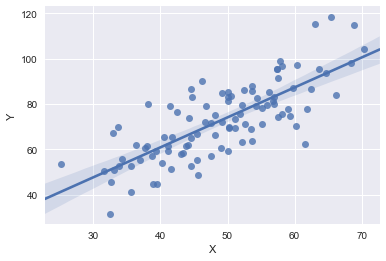

In [49]:
%matplotlib inline
ax = sns.regplot(x="X", y="Y", data=data)

## Defining Necessary Functions

First, we need to define the primary function we are going to use: linear regression function which is
```
y = m(x) + c

y = y-point
x = x-point
m = gradient
c = y-intercept
```
Basic calculus ezpz

In [2]:
def find_y(x, m, c):
    return (m * x) + c

Next, we need to define *cost/loss/error* function. This is the one we are trying to minimize. The intuition is that we are finding certain values of **m** and **c** so that our **cost function** is as close as possible to 0. We will use **mean square error** as our cost function
```
MSE = (1/n) * sum( (Y - y)^2 )

MSE = Mean Square Error
n = number of points
Y = Y value we get from our equation
y = the actual y value
```

In [53]:
def find_error(actual_y, calculated_y):
    return actual_y - calculated_y

def find_square_error(actual_y, calculated_y):
    return (find_error(actual_y, calculated_y))**2

def find_mse(points_dtf, m, c):
    list_of_square_error = points_dtf.apply(lambda x: find_square_error( # This is to find the square error of each row
        find_y(x[0], m, c), x[1]), axis=1) # Use axis=1 so that both columns are captured
    sum_of_square_error = list_of_square_error.sum()
    return sum_of_square_error / list_of_square_error.size
    

Let's try the default argument where m and c is 0

In [54]:
find_mse(data, 0, 0)

5565.107834483214

As we want the value of MSE to be as close to 0 as possible, clearly 5000+ isn't really a good number. We need another magic function called gradient descent to solve this

## Gradient Descent

The intuition of this function is to get a certain new value based on a function whose input is the current value. It seems like a mouthful explanation so let's just see the mathematical expression 
```
new_value = old_value - ( learning_rate * function_with_old_value )

new_value = updated value
old_value = current value
learning_rate = how fast the model learns (Gonna visualize this)
function_with_old_value = resulting value from a function whose input is the current value
```

This includes partial derivatives too. Read up more on this if you have any questions. Again, the focus here is to visualise the effect if various hyperparameter and not basic ML knowledge

In [55]:
def find_partial_derivative_m(points_dtf, m, c):
    list_of_derivatives = points_dtf.apply(lambda x: x[0] * find_error(x[1], find_y(x[0], m, c)), axis=1)
    return (-1 * list_of_derivatives.sum()) / (2*list_of_derivatives.size)

def find_partial_derivative_c(points_dtf, m, c):
    list_of_derivatives = points_dtf.apply(lambda x: find_error(x[1], find_y(x[0], m, c)) , axis=1)
    return (-1 * list_of_derivatives.sum()) / (2*list_of_derivatives.size)
    
def find_new_c(c, partial_c, learning_rate):
    return c - (learning_rate * partial_c)

def find_new_m(m, partial_m, learning_rate):
    return m - (learning_rate * partial_m)

def find_gradient(points_dtf, m, c, learning_rate):
    partial_m = find_partial_derivative_m(points_dtf, m, c)
    partial_c = find_partial_derivative_c(points_dtf, m, c)
    
    c = find_new_c(c, partial_c, learning_rate)
    m = find_new_m(m, partial_m, learning_rate)
    
    return (m, c)

Now we define the main function to run gradient descent

In [56]:
def gradient_descent(points_dtf, initial_m, initial_c, learning_rate, iteration):
    c = initial_c
    m = initial_m
    for x in range(0, iteration):
        m, c = find_gradient(points_dtf, m, c, learning_rate)
    return m, c

Let's see the new **m** and **c** as well as the updated **MSE**

In [61]:
m, c =gradient_descent(data, 0, 0, 0.001, 1000)

In [62]:
# New MSE
find_mse(data, m, c)

112.56202948374712

In [63]:
print(m, c)

1.47599558405 0.177897509182
